# Pre-processing:

## 1. Check for column names and Fix Errors
## 2. Remove \$  sign and '-' from all columns where they are present
## 3. Change datatype from objects to int after the above two.
## 4. Removing " , " (comma) from all numerical numbers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import textwrap
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import panel as pn
pn.extension('tabulator', design='material', template='material', loading_indicator=True)
import hvplot.pandas
 
import holoviews as hv

from holoviews import opts
hv.extension('bokeh')
import matplotlib as mpl
from panel.interact import interact



### Check File Contents

In [28]:

df = pd.read_csv('Financials.csv')

# Display the first few rows of the DataFrame
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


### Trim All White spaces in object columns in the dataset

In [29]:
df_obj = df.select_dtypes(['object', 'string'])

df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [30]:
df.columns = df.columns.str.strip()
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [31]:
[
 Segment,
 Country,
 Product,
 Discount_Band,
 Units_Sold,
 Manufacturing_Price,
 Sale_Price,
 Gross_Sales,
 Discounts,
 Sales,
 COGS,
 Profit,
 Date,
 Month_Number,
 Month_Name,
 Year
] = [
'Segment',
 'Country',
 'Product',
 'Discount Band',
 'Units Sold',
 'Manufacturing Price',
 'Sale Price',
 'Gross Sales',
 'Discounts',
 'Sales',
 'COGS',
 'Profit',
 'Date',
 'Month Number',
 'Month Name',
 'Year'] 


In [32]:
Numerical_Columns = [Units_Sold, Manufacturing_Price, Sale_Price, Gross_Sales, Discounts, Sales, COGS, Profit]
 
df[Numerical_Columns] = df[Numerical_Columns].replace({'\$':'','-':'0',',':''},regex=True)
df.head()
    

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,0,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,0,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,0,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,0,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,0,37050.00,24700.00,12350.00,01/06/2014,6,June,2014


## Numbers in () are Negative, So to Preppend '-'  to the values

In [33]:
df[Numerical_Columns] = df[Numerical_Columns].replace({'\(':'-','\)':'',' ':''},regex=True)
df.head()
    

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,0,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,0,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,0,32670.00,21780.00,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,13320.00,0,13320.00,8880.00,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.00,3.00,15.00,37050.00,0,37050.00,24700.00,12350.00,01/06/2014,6,June,2014


## convert numerical columns to integer data type

In [34]:
df[Numerical_Columns] = df[Numerical_Columns].astype(float)
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


## Convert date to datetime format


In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


## And delete Non essential columns

In [36]:
Non_Essential_columns = [Month_Number, Month_Name, Year]

df = df.drop(Non_Essential_columns, axis=1)
 
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06


## Questions and Desired Insights

1. What is the average number of units sold per segment?
2. Which country has the highest sales?
3. Which product has the highest profit margin?
4. How does the discount band affect sales?
5. What is the average manufacturing price per product?
6. What is the average sale price per product?
7. What is the total gross sales for each segment?
8. What is the total amount of discounts given for each segment?
9. What is the total sales for each segment?
10. What is the total cost of goods sold (COGS) for each segment?
11. What is the total profit for each segment?
12. How do sales vary by date?
13. Which country has the highest profit margin?
14. Which product has the highest gross sales?
15. How does the discount band affect profit margin?
16. What is the average discount given per product?
17. What is the average sale price per country?
18. What is the total gross sales for each country?
19. What is the total amount of discounts given for each country?
20. What is the total profit for each country?

## Relationship Groups To be Visualized

 
**Group 1: Sales Overview**
1. Sales by segment - Treemap
2. Sales by country - Bar
3. Sales by product and Country - Stacked bar chart and Heatmap (Colour + Size Embed)
4. Sales by discount band - Line chart or Area chart
5. Sales by date - Line chart or Area chart

**Group 2: Profitability**
1. Profit by segment - Stacked bar chart or Treemap
2. Profit by country - Choropleth map or Bubble chart
3. Profit by product - Stacked bar chart or Treemap
4. Profit margin by product - Bar chart or Dot plot
5. Profit margin by country - Bar chart or Dot plot

**Group 3: Discounts**
1. Discounts by segment - Stacked bar chart or Treemap
2. Discounts by country - Choropleth map or Bubble chart
3. Discounts by product - Stacked bar chart or Treemap
4. Average discount by product - Bar chart or Dot plot
5. Profit margin by discount band - Line chart or Area chart

**Group 4: Manufacturing and Pricing**
1. Average manufacturing price by product - Bar chart or Dot plot
2. Average sale price by product - Bar chart or Dot plot
3. Average sale price by country - Bar chart or Dot plot
4. Gross sales by product - Stacked bar chart or Treemap
5. COGS by segment - Stacked bar chart or Treemap

**Group 5: Units Sold**
1. Average number of units sold per segment - Bar chart or Dot plot
2. Units sold by country - Choropleth map or Bubble chart
3. Units sold by product - Stacked bar chart or Treemap
4. Units sold by discount band - Line chart or Area chart
5. Units sold by date - Line chart or Area chart
 

## Sales by segment -  Treemap

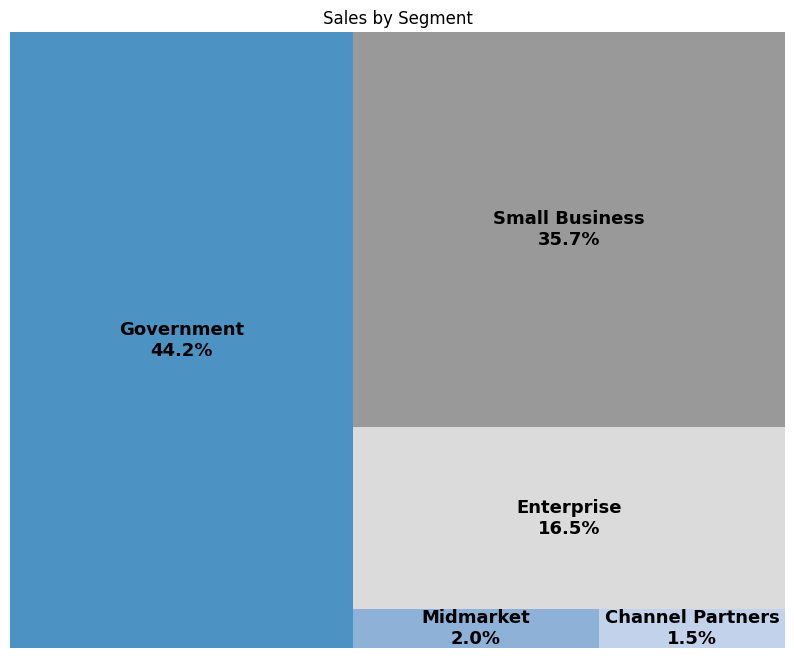

In [11]:
 
segments = df[Segment].unique()
sales_per_segment = [df[df[Segment] == segment][Sales].sum() for segment in segments]
total_sales = sum(sales_per_segment)
percentages = [f'{segment}\n{sales_per_segment/total_sales:.1%}' for segment, sales_per_segment in zip(segments, sales_per_segment)]

# Create a gradient of 5 shades between blue and grey
colors = ['#1f77b4', '#729ece', '#b4c7e7', '#d3d3d3', '#808080']

# Plot the data
fig, ax = plt.subplots(figsize=(10,8))
squarify.plot(sizes=sales_per_segment, label=percentages, color=colors, alpha=.8, text_kwargs={'fontweight': 'bold', 'fontsize':13})
ax.set_title('Sales by Segment')
plt.axis('off')
plt.show()


## Sales by Country

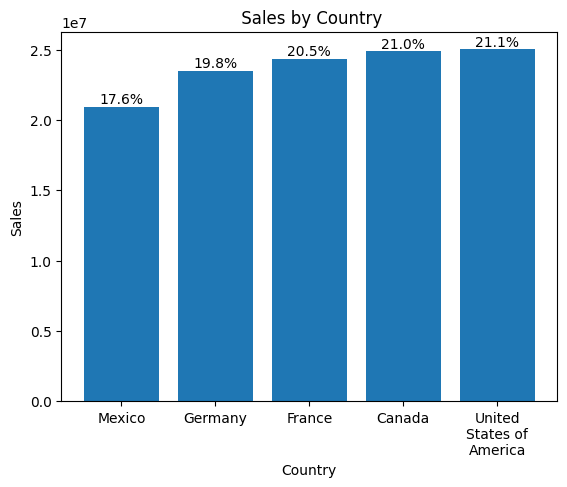

In [12]:
 
#Using DataFrame DataFrame named 'df' with columns 'Country' and 'Sales'
sales_by_country = df.groupby(Country)[Sales].sum().reset_index()
sales_by_country = sales_by_country.sort_values(Sales,ascending=True)

total_sales = sales_by_country[Sales].sum()


# Plot the data
fig, ax = plt.subplots()
bars = ax.bar(sales_by_country[Country], sales_by_country[Sales])
ax.set_xlabel(Country)
ax.set_ylabel(Sales)
ax.set_title(f' {Sales} by {Country}')

# Wrap the x-axis tick labels
tick_labels = [textwrap.fill(label, 10) for label in sales_by_country[Country]]
ax.set_xticks(range(len(sales_by_country[Country])))
ax.set_xticklabels(tick_labels)

# Add the percentage of total sales to each bar
for bar, sales in zip(bars, sales_by_country[Sales]):
    percentage = sales / total_sales
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1%}', ha='center', va='bottom')

plt.show()


## Pivot Table of Sales by country and product category

In [13]:
df.groupby(['Product', 'Country'])['Sales'].sum().reset_index().pivot(index='Product', columns='Country', values='Sales').fillna(0)

Country,Canada,France,Germany,Mexico,United States of America
Product,,,,,
Amarilla,3855765.88,4016427.13,3960250.26,3077555.39,2837117.41
Carretera,2610204.34,3423321.90,3062340.68,2879601.42,1839839.55
Montana,2711919.03,3527382.37,3566044.37,1941329.31,3644126.80
Paseo,7611520.99,5597751.06,5229814.74,7627731.39,6944325.78
VTT,4768754.31,3811193.59,3293983.77,3172396.71,5465592.64
Velo,3329490.34,3978096.24,4392907.00,2250737.89,4298828.00


## Categorize Sales by country and products

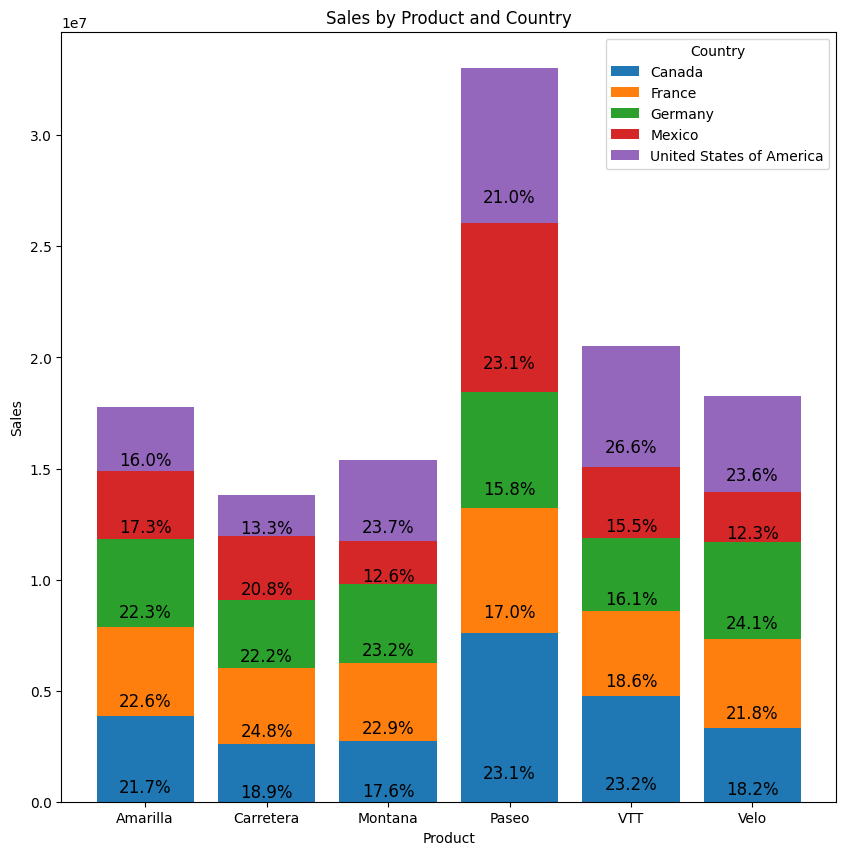

In [14]:
 

# Using DataFrame 'df' with columns 'Country', 'Product', and 'Sales'
sales_by_product_country = df.groupby(['Product', 'Country'])['Sales'].sum().reset_index()
sales_by_product_country = sales_by_product_country.pivot(index='Product', columns='Country', values='Sales').fillna(0)
countries = sales_by_product_country.columns
total_sales_by_product = sales_by_product_country.sum(axis=1)

# Plot the data
fig, ax = plt.subplots(figsize=(10,10))
bottom = [0] * len(sales_by_product_country)
for country in countries:
    sales = sales_by_product_country[country]
    ax.bar(sales_by_product_country.index, sales, bottom=bottom, label=country)
    for i, (x, y) in enumerate(zip(bottom,  sales)):
        percentage = y / total_sales_by_product[i]
        ax.text(i, x + y / 6, f'{percentage:.1%}', ha='center', va='center', fontsize=12)
        #The first two arguments, i and x + y / 6, specify the x and y coordinates of the text, respectively. 
        #In this case, i is the index of the product, and x + y / 6 is the vertical center of the substack.
    bottom += sales

ax.set_xlabel('Product')
ax.set_ylabel('Sales')
ax.set_title('Sales by Product and Country')
ax.legend(title='Country')

plt.xticks()
plt.show()


C:\Users\USER\anaconda3\envs\Company_Financials\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


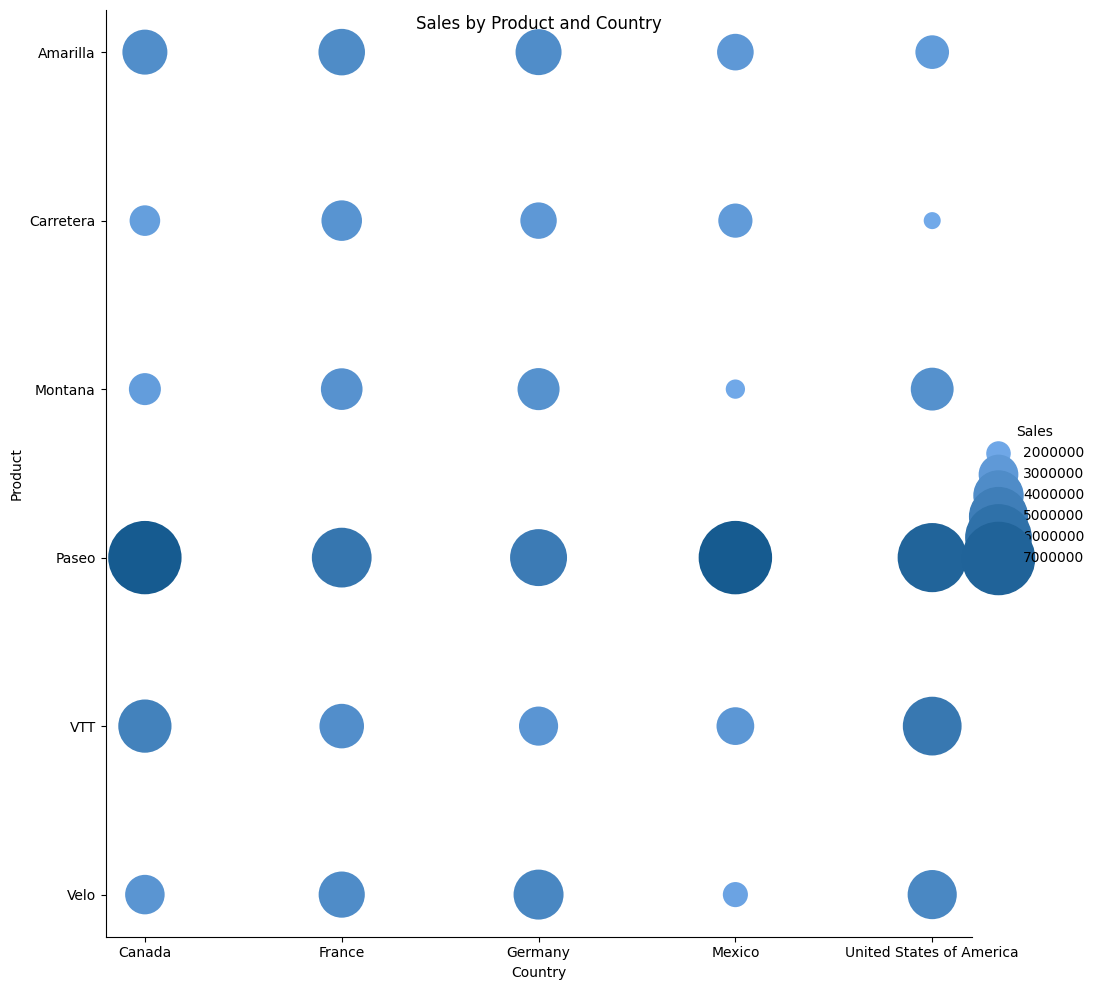

In [15]:




# Create a custom color map
cmap = LinearSegmentedColormap.from_list('Blues', ['#71A9E9', '#165B90'])

 

# Melt the data into long format
melted_df = sales_by_product_country.reset_index().melt(id_vars='Product', var_name='Country', value_name='Sales')

# Plot the data
g = sns.relplot(data=melted_df, x='Country', y='Product', size='Sales', 
                hue='Sales', sizes=(200, 3000), height=10, palette=cmap)

g.set_xlabels('Country')
g.set_ylabels('Product')
g.fig.suptitle('Sales by Product and Country')

plt.show()


## Changing the Discount Band data type to category and ordering it

In [37]:
# Categorizing the DataFrame 'df' with based on 'Discount Band' ie changing the datatype o category
df['Discount Band'] = pd.Categorical(df['Discount Band'], categories=['None', 'Low', 'Medium', 'High'], ordered=True)
df['Discount Band'] 

0      None
1      None
2      None
3      None
4      None
       ... 
695    High
696    High
697    High
698    High
699    High
Name: Discount Band, Length: 700, dtype: category
Categories (4, object): ['None' < 'Low' < 'Medium' < 'High']

In [38]:
df2 = df.groupby(['Discount Band', ])['Sales'].sum().reset_index()
df2

,Discount Band,Sales
0,None,7943654.00
1,Low,34629778.71
2,Medium,38780430.84
3,High,37372486.74


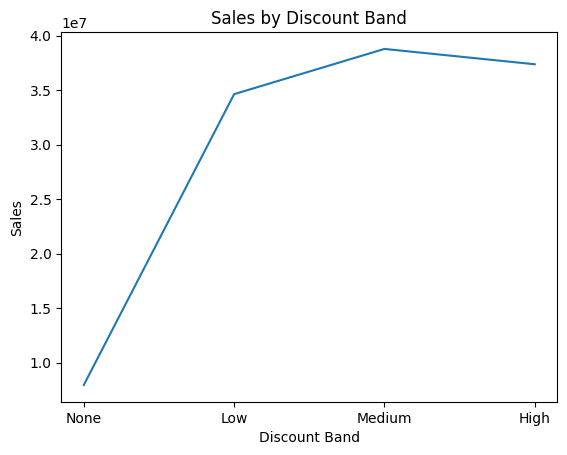

In [39]:

sales_by_discount_band = df.groupby('Discount Band')['Sales'].sum().reset_index()

sales_by_discount_band['Discount Band'] = sales_by_discount_band['Discount Band']

# s = sales_by_discount_band['new Discount Band'].set_categories(["None","Low","Medium","High"])

sales_by_discount_band['Discount Band'] 

# # Plot the data
fig, ax = plt.subplots( )
sns.lineplot(data=sales_by_discount_band, x='Discount Band', y='Sales', ax=ax)

ax.set_xlabel('Discount Band')
ax.set_ylabel('Sales')
ax.set_title('Sales by Discount Band')

plt.show()




In [19]:
df[Profit]

0      16185.00
1      13210.00
2      10890.00
3       4440.00
4      12350.00
         ...   
695    12375.00
696     2730.00
697     1299.60
698      686.85
699    13003.20
Name: Profit, Length: 700, dtype: float64

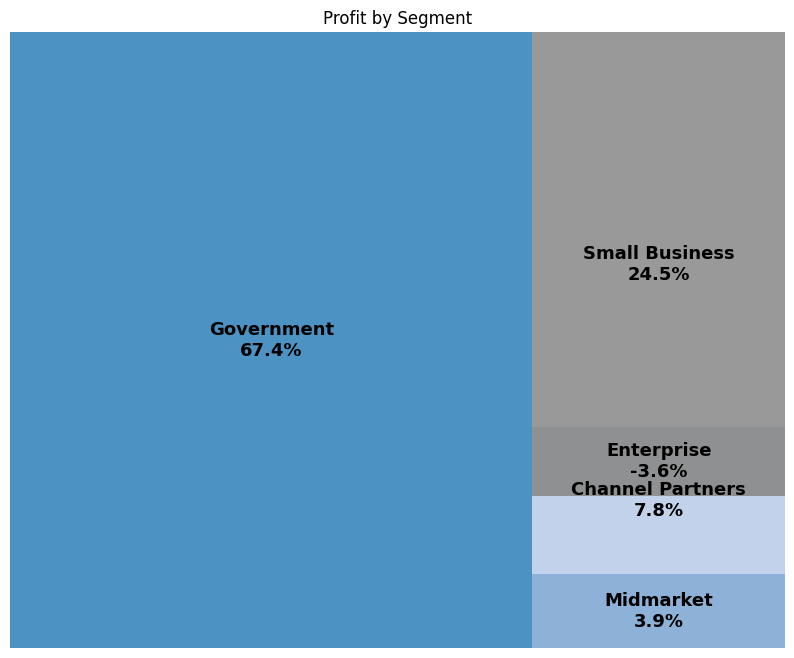

In [20]:
 
segments = df[Segment].unique()
profit_per_segment = [df[df[Segment] == segment][Profit].sum() for segment in segments]
total_profit = sum(profit_per_segment)
percentages = [f'{segment}\n{profit_per_segment/total_profit:.1%}' for segment, profit_per_segment in zip(segments, profit_per_segment)]

# Create a gradient of 5 shades between blue and grey
colors = ['#1f77b4', '#729ece', '#b4c7e7', '#d3d3d3', '#808080']

# Plot the data
fig, ax = plt.subplots(figsize=(10,8))
squarify.plot(sizes=profit_per_segment, label=percentages, color=colors, alpha=.8, text_kwargs={'fontweight': 'bold', 'fontsize':13})
ax.set_title('Profit by Segment')
plt.axis('off')
plt.show()


In [21]:
profit_per_segment = [df[df[Segment] == segment][Profit].sum() for segment in segments]
total_profit = sum(profit_per_segment)
percentages = [f'{segment}\n{profit_per_segment/total_profit:.1%}' for segment, profit_per_segment in zip(segments, profit_per_segment)]


 
profit_per_segment  
 


[11388173.180000002, 660103.0900000001, 1316803.14, -614545.62, 4143168.5]

In [22]:
pn.Column('a','c','d')

Column(design=<class 'panel.theme.materi...)
    [0] Markdown(str, design=<class 'panel.theme.materi...)
    [1] Markdown(str, design=<class 'panel.theme.materi...)
    [2] Markdown(str, design=<class 'panel.theme.materi...)